In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

In [60]:
import json
import pickle

In [4]:
df = pd.read_csv('adsales.csv')

In [5]:
df.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [7]:
df['Influencer'] = np.where(df['Influencer']=='Mega','mega',
                           np.where(df['Influencer']=='Micro', 'micro',
                                   np.where(df['Influencer']=='Macro','macro','nano')))

In [9]:
df.columns

Index(['TV', 'Radio', 'Social Media', 'Influencer', 'Sales'], dtype='object')

In [10]:
df.columns = ['tv', 'radio', 'social_media', 'influencer', 'sales']

In [11]:
df.head()

,tv,radio,social_media,influencer,sales
0,16.0,6.566231,2.907983,mega,54.732757
1,13.0,9.237765,2.409567,mega,46.677897
2,41.0,15.886446,2.913410,mega,150.177829
3,83.0,30.020028,6.922304,mega,298.246340
4,15.0,8.437408,1.405998,micro,56.594181


In [12]:
df['radio']= round(df['radio'],2)

In [13]:
df['social_media'] = round(df['social_media'],2)

In [14]:
df.head()

,tv,radio,social_media,influencer,sales
0,16.0,6.57,2.91,mega,54.732757
1,13.0,9.24,2.41,mega,46.677897
2,41.0,15.89,2.91,mega,150.177829
3,83.0,30.02,6.92,mega,298.246340
4,15.0,8.44,1.41,micro,56.594181


In [16]:
df.isna().sum()
df.dropna(inplace = True)

In [18]:
df.head()

,tv,radio,social_media,influencer,sales
0,16.0,6.57,2.91,mega,54.732757
1,13.0,9.24,2.41,mega,46.677897
2,41.0,15.89,2.91,mega,150.177829
3,83.0,30.02,6.92,mega,298.246340
4,15.0,8.44,1.41,micro,56.594181


In [27]:
q1 = df['radio'].quantile(0.25)
q3 = df['radio'].quantile(0.75)
iqr = q3-q1
upper = q3 + 1.5*iqr

df['radio'] = np.where(df['radio']> upper, upper, df['radio'])

<Axes: >

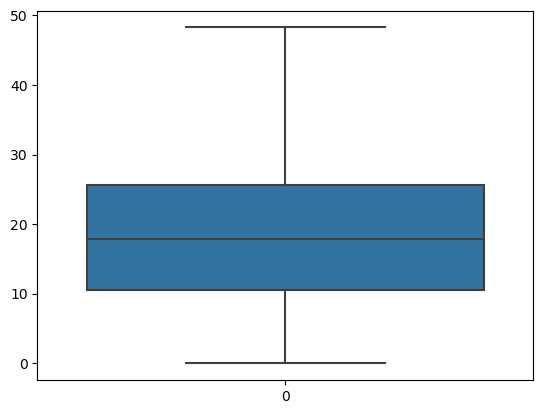

In [28]:
sns.boxplot(df['radio'])

<Axes: >

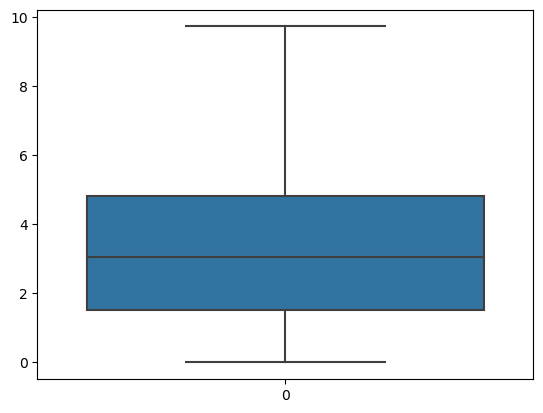

In [29]:
q1 = df['social_media'].quantile(0.25)
q3 = df['social_media'].quantile(0.75)
iqr = q3-q1
upper = q3 + 1.5*iqr

df['social_media'] = np.where(df['social_media']> upper, upper, df['social_media'])
sns.boxplot(df['social_media'])

In [30]:
df = pd.get_dummies(df, columns=['influencer'], dtype=int )

,tv,radio,social_media,sales,influencer_macro,influencer_mega,influencer_micro,influencer_nano
0,16.0,6.57,2.91,54.732757,0,1,0,0
1,13.0,9.24,2.41,46.677897,0,1,0,0
2,41.0,15.89,2.91,150.177829,0,1,0,0
3,83.0,30.02,6.92,298.246340,0,1,0,0
4,15.0,8.44,1.41,56.594181,0,0,1,0
...,...,...,...,...,...,...,...,...
4567,26.0,4.47,0.72,94.685866,0,0,1,0
4568,71.0,20.61,6.55,249.101915,0,0,0,1
4569,44.0,19.80,5.10,163.631457,0,0,1,0
4570,71.0,17.53,1.94,253.610411,1,0,0,0


In [31]:
df.head()

,tv,radio,social_media,sales,influencer_macro,influencer_mega,influencer_micro,influencer_nano
0,16.0,6.57,2.91,54.732757,0,1,0,0
1,13.0,9.24,2.41,46.677897,0,1,0,0
2,41.0,15.89,2.91,150.177829,0,1,0,0
3,83.0,30.02,6.92,298.246340,0,1,0,0
4,15.0,8.44,1.41,56.594181,0,0,1,0


In [32]:
x = df.drop('sales', axis =1)
y = df['sales']

In [36]:
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 2)

In [37]:
mod = LinearRegression()

In [38]:
mod.fit(x_train,y_train)

LinearRegression()

In [39]:
comment = 'This is train data'

def evaluation(comment, data, model):
    pred = model.predict(data)
    mse = mean_squared_error(y_train, pred)
    mae = mean_absolute_error(y_train, pred)
    r2 = r2_score(y_train, pred)
    adj = 1 - (1-r2)*(data.shape[0])/(data.shape[0]- data.shape[1] - 1)
    return mse,mae,r2,adj

evaluation(comment, x_train,mod)

(8.63876117646443, 2.352623553273434, 0.9990022581274304, 0.9990000580350984)

In [41]:
comment = 'This is test data'

def evaluation(comment, data, model):
    pred = model.predict(data)
    mse = mean_squared_error(y_test, pred)
    mae = mean_absolute_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    adj = 1 - (1-r2)*(data.shape[0])/(data.shape[0]- data.shape[1] - 1)
    return mse,mae,r2,adj

evaluation(comment, x_test,mod)

(8.913590162027706, 2.411326410442482, 0.9989655610922099, 0.9989563864677505)

In [46]:
mod.predict(x_train.head(1))[0]

177.86799406904606

In [47]:
x_train.columns

Index(['tv', 'radio', 'social_media', 'influencer_macro', 'influencer_mega',
       'influencer_micro', 'influencer_nano'],
      dtype='object')

In [49]:
project_data = {"columns" : ["tv", "radio", "social_media", "influencer_macro", "influencer_mega",
       "influencer_micro", "influencer_nano"]}

In [57]:
tv = 43.3
radio = 23.2
social_media = 7.1
influencer ="micro"

In [58]:
test_array = np.zeros(len(project_data["columns"]))
test_array[0] = tv
test_array[1]= radio
test_array[2]= social_media
influ_ind = project_data['columns'].index("influencer_"+ influencer)
test_array[influ_ind] = 1
test_array

array([43.3, 23.2,  7.1,  0. ,  0. ,  1. ,  0. ])

In [59]:
mod.predict([test_array])[0]

C:\Users\D\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


154.08937669532966

In [62]:
with open('adsales.pkl', 'wb') as f:
    pickle.dump(mod,f)

with open('project_data.json','w') as f:
    json.dump(project_data,f)